# predicting companies bankruptcy:

In this project we atempted to predict weither a company will dclare bancruptcy or not from the the follwing dataset: [Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction) using methods learned on ics 485 course, we will also use multiple techniques to deal with unbalanced data such as smote over sampler and random under sampler, so the content of this project can be divided as follow:  
Dataset analysis and report on important statistics
1. Dataset analysis and splitting and preprocessing
2. Dealing with imbalanced data
3. Correlation analysis 
4. List of classifiers used 
5. Proper hyper-parameter tuning based on separate validation set 
6. ppropriate evaluation measures
7. Final results on the test set
8. Error analysis and possible improvements


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## 1. Dataset analysis and splitting and preprocessing:
here first thing will do is reading that data, then print the dimensions after that we immediately split the data before doing any analysis because we want to treat the test as if it was not available for us in the training period to avoid overfitting, and bias to the available data.


In [2]:
np.random.seed(4)
np.random.seed(4)
df = pd.read_csv('data.csv')
df1 = pd.read_csv('data.csv')
df_arr = np.array(df)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
print("dataset dimensions: ", np.shape(df_arr))
print("Number of samples: ", len(df_arr))
print("Number of features: ", len(df_arr))

dataset dimensions:  (6819, 96)
Number of samples:  6819
Number of features:  6819


In [4]:
train_lables = df.pop('Bankrupt?')
train_data = df
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy  = train_test_split(train_data, train_lables,test_size=0.3)
valx,testx,valy,testy = train_test_split(train_data, train_lables,test_size=0.5)

## 2. Dealing with imbalanced data:  
There are many methods to deal with unbalanced data one of the most popular ones is SMOTE which is oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier, this method differs from random oversampling as it does not generate duplicate samples but use KNN to generate new data and we will show that graphically in the next cells

## Upsampling

In [5]:

data_lable, data_count = np.unique(trainy, return_counts=True)
print("Training set distribution:")
print(dict(zip(data_lable, data_count)))
data_lable, data_count = np.unique(valy, return_counts=True)
print("val set distribution:")
print(dict(zip(data_lable, data_count)))
data_lable, data_count = np.unique(testy, return_counts=True)
print("test set distribution:")
print(dict(zip(data_lable, data_count)))




Training set distribution:
{0: 4620, 1: 153}
val set distribution:
{0: 3288, 1: 121}
test set distribution:
{0: 3311, 1: 99}


From the above cell we saw that the data is very unbalanced, here we will attempt to graph it to see the difference: 

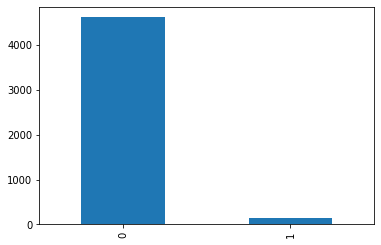

In [6]:
trainy.value_counts().plot.bar()
plt.show()

We saw now that the data is obviously unbalanced but I will scatter the data as labels vs one feature to see how the distribution will be different when sampling using SMOTE

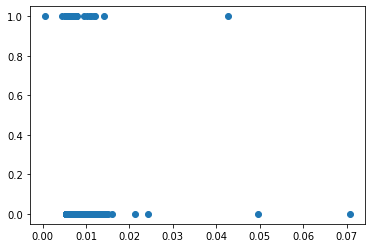

In [7]:
plt.scatter(np.array(trainx)[:,40], trainy, label='lable vs feature')

In [8]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
trainx_us, trainy_us =oversample.fit_resample(trainx,trainy)


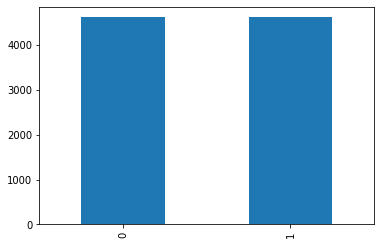

In [9]:
trainy_us.value_counts().plot.bar()
plt.show()

Now the data are balanced, but did SMOTE is actually any different from random up sampler? From the above graph we cannot really tell so will also plot the scatter plot as the cell above to see if there is a difference 

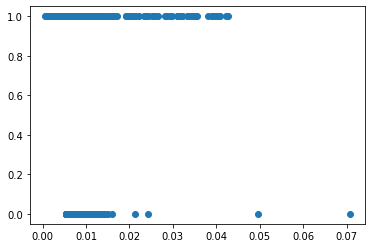

In [10]:
plt.scatter(np.array(trainx_us)[:,40], trainy_us, label='lable vs feature')


Now this graph makes it obvious that the SMOTE oversample did actually generate new data rather than just duplicating because we can see that the graph is different, if it is not then the scatter graph will be the same because the new data will be in the exact spot of the previous data.   
  
## donwsampling  
here we will also do down samping with keeping in mind that the result might not be as good because the minority class is so much lower than the majority class so the data might not be enough for the training.

In [11]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
trainx_ds, trainy_ds =undersample.fit_resample(trainx,trainy)

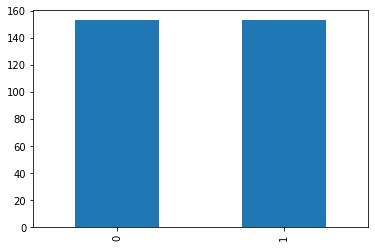

In [12]:
trainy_ds.value_counts().plot.bar()
plt.show()

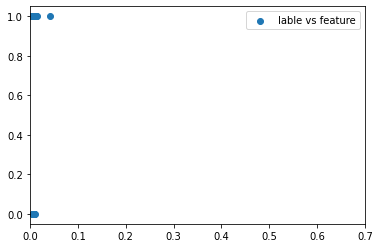

In [13]:
plt.scatter(np.array(trainx_ds)[:,40], trainy_ds, label='lable vs feature')
plt.legend()
plt.xlim([0, 0.7])
plt.show()

here we can see the data is randomly undersampled, this is not much diffrent than dropping some rows randomly from the dataframe. so there is no need to train data for this like in the SMOTE apreaoch.

## Normalization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
trainx_us.values[:] = scaler.fit_transform(trainx_us)
trainx.values[:] = scaler.fit_transform(trainx)
trainx_ds.values[:] = scaler.fit_transform(trainx_ds)
valx.values[:] = scaler.transform(valx)
testx.values[:]= scaler.transform(testx)

## 3. Correlation analysis:
Correlation is defined as a statistical method used to measure the strength of the linear relationship between two variables and compute their association. and it used in many applicationBut for our problem it is important to detect non important data  for example if two features exactly the same hence collation =1 or always reverse of the other hence collation = -1, having them both is just a waste of training time so here we will visualize then remove the highly correlated features from our dataset


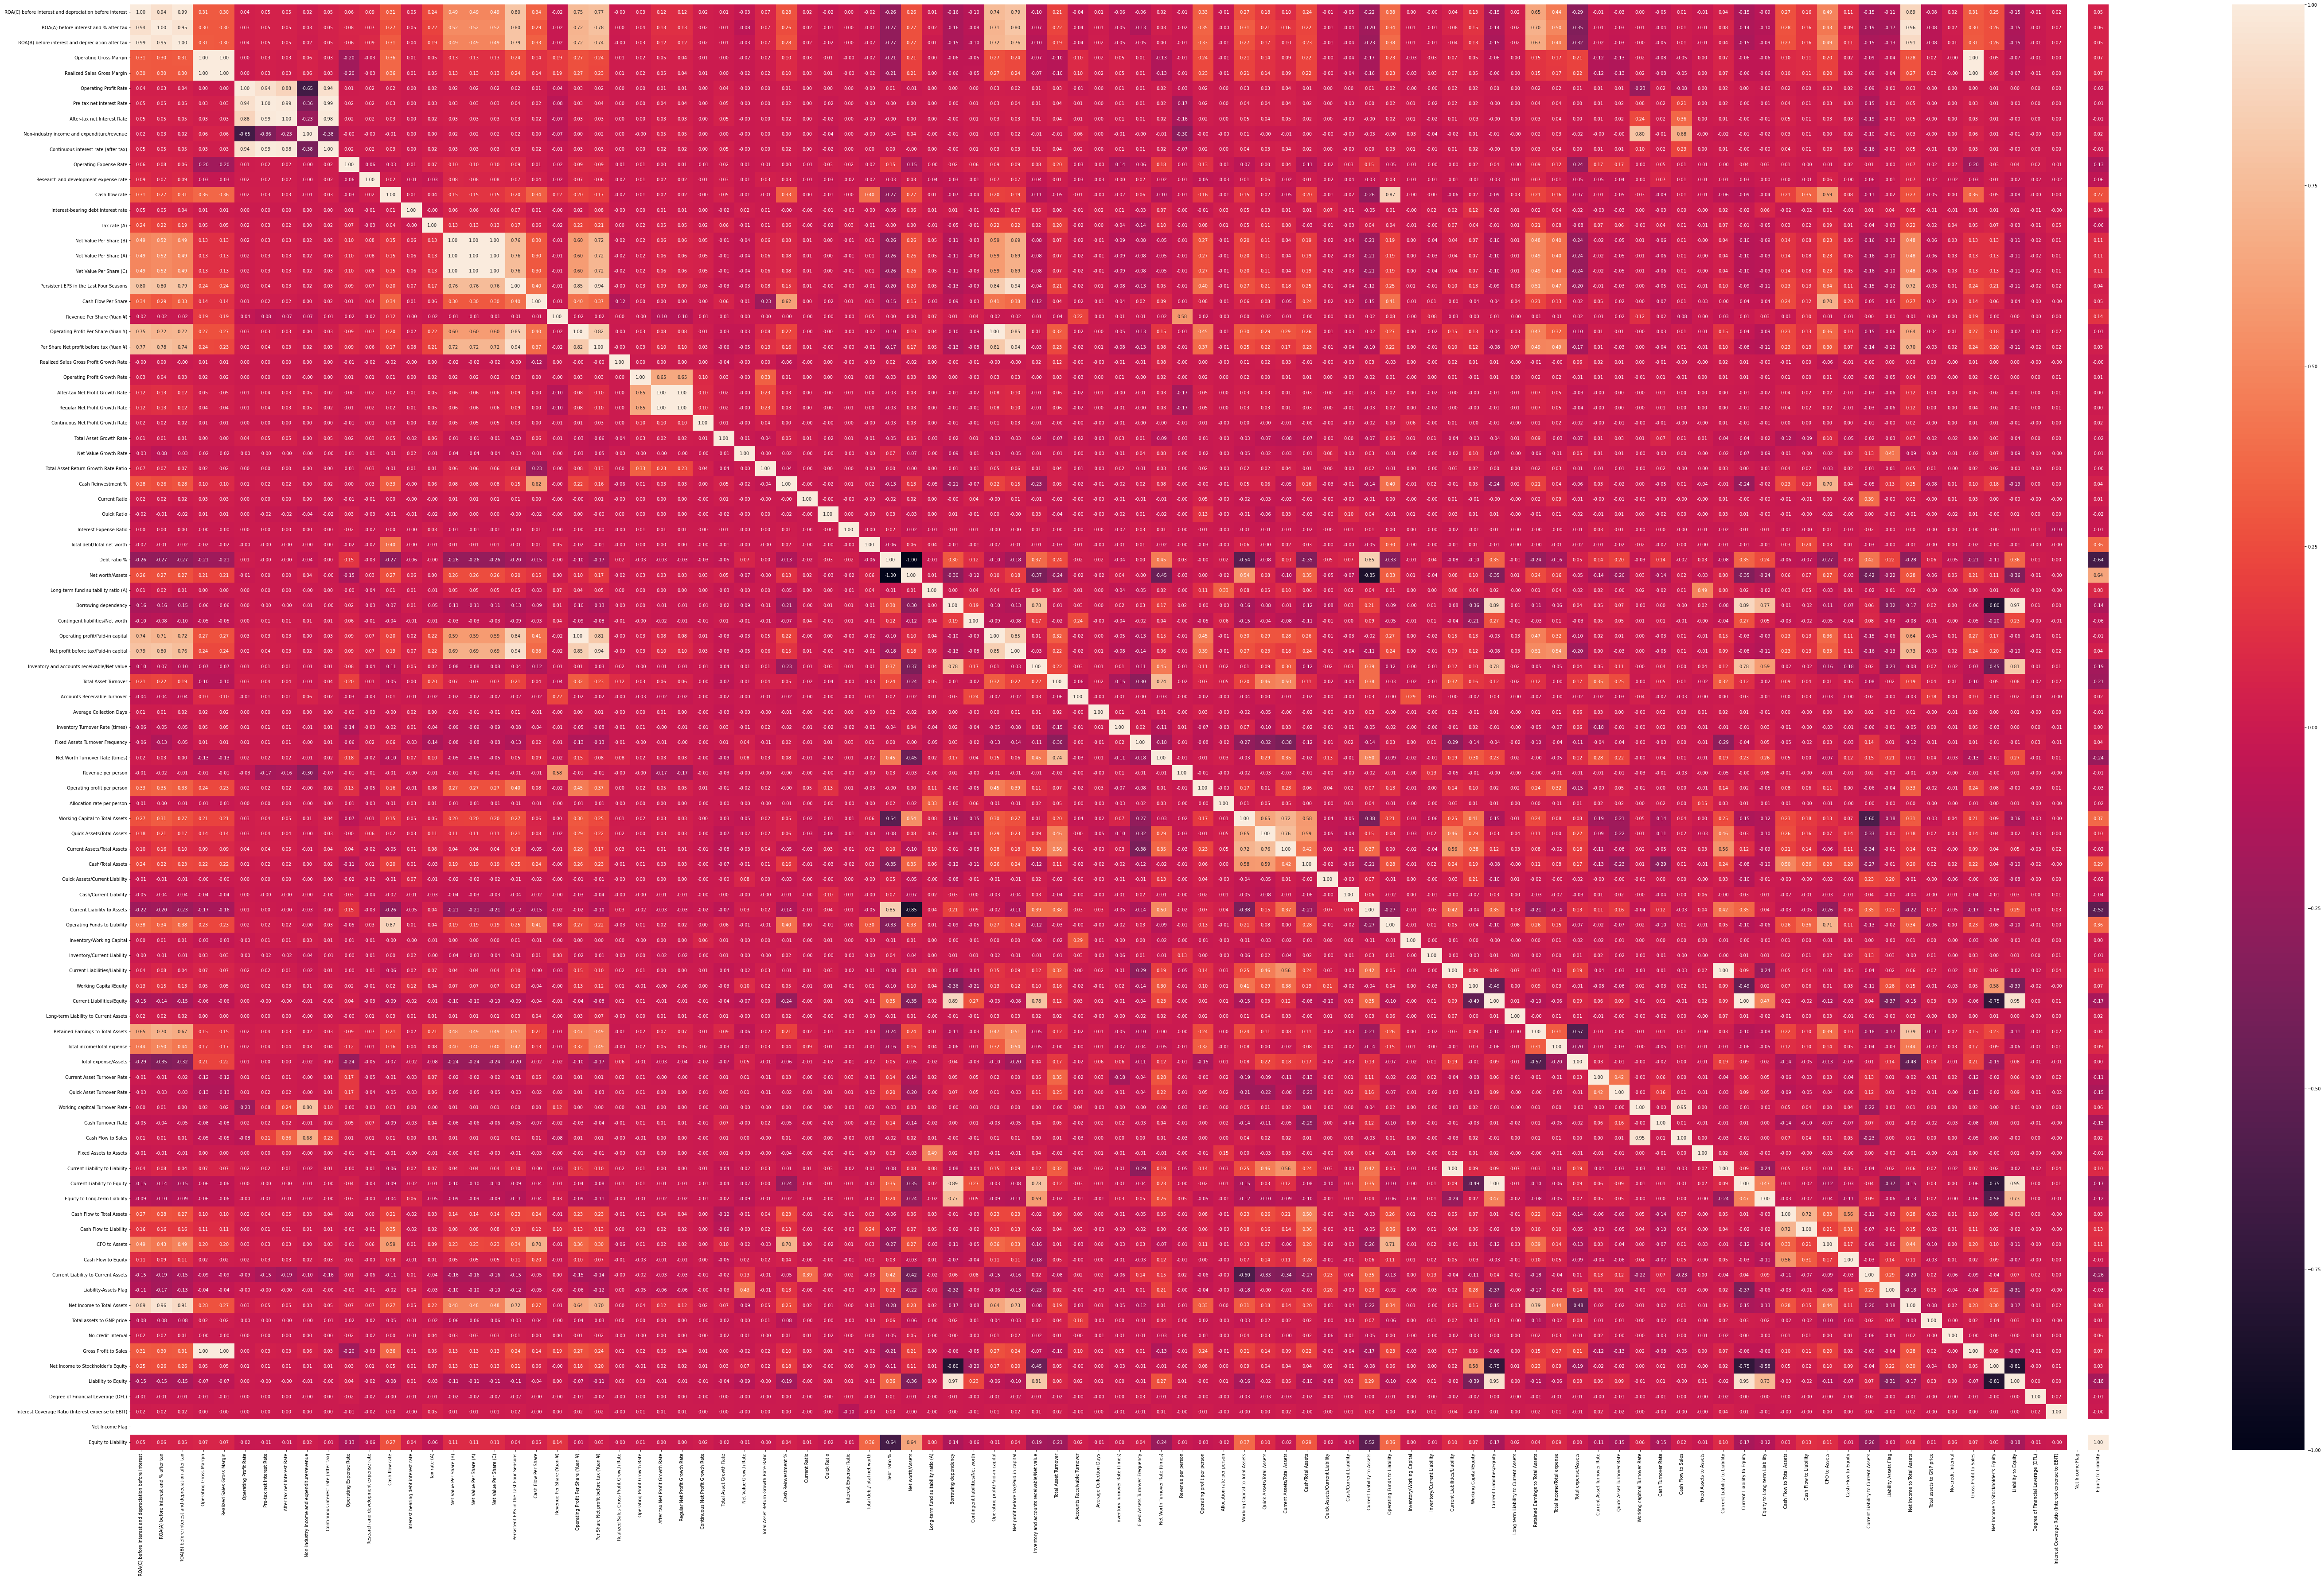

In [15]:

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_correlation(data):

    rcParams['figure.figsize'] = 100, 60
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()



plot_correlation(trainx)


rcParams['figure.figsize'] = 6.4,4.8



The correlation matrix is huge due to almost 100 features, but we can see that most of our features has low correlation except few and oncourse the diagonal is always 1 because every feature is 100% correlated with itself.
![](https://i.ibb.co/gV8MPm0/Screenshot-2021-12-20-223529.png)  
here we see some negatively correlated features we need to deal with in the next cell

In [16]:
print('number of features before removing higly corlated features: ', np.array(trainx).shape[1])
corr_matrix = trainx.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
trainx.drop(to_drop, axis=1, inplace=True)
trainx_ds.drop(to_drop, axis=1, inplace=True)
trainx_us.drop(to_drop, axis=1, inplace=True)
valx.drop(to_drop, axis=1, inplace=True)
testx.drop(to_drop, axis=1, inplace=True)
print('number of features after removing higly corlated features: ', np.array(trainx).shape[1])


number of features before removing higly corlated features:  95
number of features after removing higly corlated features:  76


so here we removed highly correlated features but important thing to note here is that we did our correlation analysis **ONLY** on the training data as it is the only data available to us during the training and when we find the highly correlated features we removed it from the validation and the test data as well.

## removing constant data
our data set contains some constant data that does not change which waste our training time and also gives us error when trying to select best features, so here we removed constant data from our training and test and validation datasets

In [17]:
testx = testx.loc[:, (testx != testx.iloc[0]).any()] 
valx = valx.loc[:, (valx != valx.iloc[0]).any()] 
trainx = trainx.loc[:, (trainx != trainx.iloc[0]).any()] 
trainx_ds = trainx_ds.loc[:, (trainx_ds != trainx_ds.iloc[0]).any()] 
trainx_us = trainx_us.loc[:, (trainx_us != trainx_us.iloc[0]).any()] 




simple check to make sure we did not delete different feautures from train than the ones from test:

In [18]:
trainx.columns==testx.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# selecting best features:
here we define a function to select a k number of features and pass it during the training as a hyperparamter to check for the best k features.

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

def selector(K,x,y):
    selector = SelectKBest(f_classif, k=K)
    selector.fit(x, y)
 
    cols = selector.get_support(indices=True)
    return cols
   


# 4. List of classifiers used 
**Since this is a binary classification problem we used the following classifiers:** 
 - Logistic Regression
 - KNN
 - SVC

## 5. Proper hyper-parameter tuning based on separate validation set

in hyper-parameter tuning we mainly focused on choosing the right amount of features and the best training set (down sampled, up sampled, Normal) as for the classifier specific hyperparameters we found that the default is okay and kept it except for the KNN we did try different K values.  
keep in mind even though f1 is a better measrment for unbalanced data we print our accuracy score because the f1 score is always low because we have very little data about bankrapted companies, more on that on Error analysis and possible improvements section 

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import f1_score,accuracy_score
data_options=[[trainx,trainy],[trainx_ds,trainy_ds],[trainx_us,trainy_us]]
names = ['Normal', 'Dwonsampled', 'Upsampled']
selected_features = [3,5,10,20,30,40,50,np.array(trainx).shape[1]]
best_accuracy = 0
best_f1 = 0
best_num_features = 0
best_data = ''
for features in selected_features:
    i = 0
    for x,y in data_options:
        log_model=LogisticRegression(max_iter=100000)
        print(features)
        col= selector(features,x,y)
        log_model.fit(x.iloc[:,col],y)
        y_pred = log_model.predict(valx.iloc[:,col])
        score = f1_score(valy,y_pred)
        score1 = accuracy_score(valy,y_pred)
        if score1>best_accuracy:
            best_accuracy = score1
            best_num_features = features
            best_data = names[i]
            best_f1 = score
        print(f'validation accuracy with number of selected features: {features} and unbalanced data technique: {names[i]} is : {score1} ')
        i = i+1
print(i)
print(f'best model is with number {features} features:  and unbalanced data technique: {best_data} score : {best_accuracy} ')
        
        

        

3
validation accuracy with number of selected features: 3 and unbalanced data technique: Normal is : 0.9650924024640657 
3
validation accuracy with number of selected features: 3 and unbalanced data technique: Dwonsampled is : 0.8254620123203286 
3
validation accuracy with number of selected features: 3 and unbalanced data technique: Upsampled is : 0.8612496333235553 
5
validation accuracy with number of selected features: 5 and unbalanced data technique: Normal is : 0.9647990613083015 
5
validation accuracy with number of selected features: 5 and unbalanced data technique: Dwonsampled is : 0.8729832795541215 
5
validation accuracy with number of selected features: 5 and unbalanced data technique: Upsampled is : 0.8618363156350836 
10
validation accuracy with number of selected features: 10 and unbalanced data technique: Normal is : 0.9647990613083015 
10
validation accuracy with number of selected features: 10 and unbalanced data technique: Dwonsampled is : 0.8709298914637724 
10
vali

In [21]:
from sklearn.linear_model import LogisticRegression
log_model1=LogisticRegression(max_iter=100000)
log_model1.fit(trainx,trainy)

LogisticRegression(max_iter=100000)

In [22]:
from sklearn.linear_model import LogisticRegression
log_model2=LogisticRegression(max_iter=100000)
log_model2.fit(trainx_us,trainy_us)

LogisticRegression(max_iter=100000)

In [23]:
log_model1.score(testx,testy)

0.9653958944281525

# Final results on the test set log reg

In [24]:
y_pred=log_model1.predict(testx)
y_pred1=log_model2.predict(testx)

# 6. ppropriate evaluation measures:
here we pirint out a classifcation, keep in mind that the data is not balanced so normal accuracy is misleading, so our main metric is F1 score.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(testy,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3311
           1       0.12      0.03      0.05        99

    accuracy                           0.97      3410
   macro avg       0.55      0.51      0.52      3410
weighted avg       0.95      0.97      0.96      3410



In [26]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm,2)
        
    else:
        print('')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




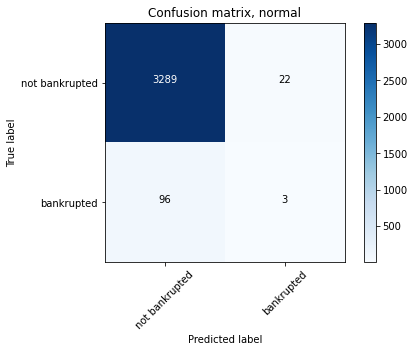

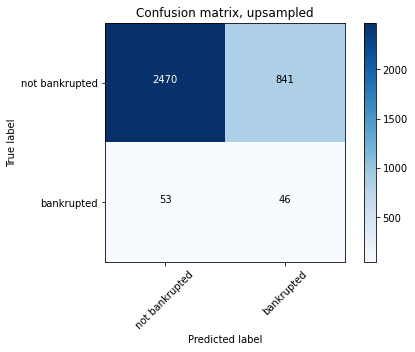

In [27]:
cnf_matrix1 = confusion_matrix(testy, y_pred)
cnf_matrix2 = confusion_matrix(testy, y_pred1)
np.set_printoptions(precision=2)
class_names = ['not bankrupted','bankrupted',]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix1, classes=class_names,
                      title='Confusion matrix, normal')
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=class_names,
                      title='Confusion matrix, upsampled')


plt.show()

# Support Vector Machine 

In [28]:
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
data_options=[[trainx,trainy],[trainx_ds,trainy_ds],[trainx_us,trainy_us]]
names = ['Normal', 'Dwonsampled', 'Upsampled']
selected_features = [3,5,10,20,30,40,50,74]
best_accuracy = 0
best_num_features = 0
best_f1 = 0
best_data = ''
for features in selected_features:
    i = 0
    for x,y in data_options:
        SVC_MODEL=SVC()
        print(features)
        col= selector(features,x,y)
        SVC_MODEL.fit(x.iloc[:,col],y)
        score = SVC_MODEL.score(valx.iloc[:,col],valy)
        if score>best_accuracy:
            best_accuracy = score
            best_num_features = features
            best_data = names[i]
        print(f'validation accuracy with number of selected features: {features} and unbalanced data technique: {names[i]} is : {score}')
        i = i+1
print(i)
print(f'best validation accuracy is with number {features} features:  and unbalanced data technique: {best_data} and it is : {best_accuracy}')
        

3
validation accuracy with number of selected features: 3 and unbalanced data technique: Normal is : 0.9650924024640657
3
validation accuracy with number of selected features: 3 and unbalanced data technique: Dwonsampled is : 0.830155470812555
3
validation accuracy with number of selected features: 3 and unbalanced data technique: Upsampled is : 0.8515693751833382
5
validation accuracy with number of selected features: 5 and unbalanced data technique: Normal is : 0.9645057201525374
5
validation accuracy with number of selected features: 5 and unbalanced data technique: Dwonsampled is : 0.8201818715165737
5
validation accuracy with number of selected features: 5 and unbalanced data technique: Upsampled is : 0.8545027867409798
10
validation accuracy with number of selected features: 10 and unbalanced data technique: Normal is : 0.9645057201525374
10
validation accuracy with number of selected features: 10 and unbalanced data technique: Dwonsampled is : 0.8506893517160458
10
validation ac

In [29]:
SVC_MODEL=SVC()
SVC_MODEL.fit(trainx_us,trainy_us)

SVC()

# Final results on the test set svc

In [30]:
y_pred3 =SVC_MODEL.predict(testx)

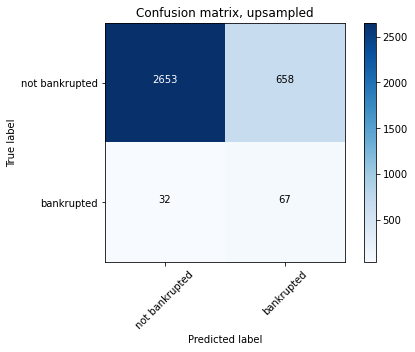

In [31]:
cnf_matrix3 = confusion_matrix(testy, y_pred3)

np.set_printoptions(precision=2)
class_names = ['not bankrupted','bankrupted',]
# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix3, classes=class_names,
                      title='Confusion matrix, upsampled')

In [32]:
print(classification_report(testy, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      3311
           1       0.09      0.68      0.16        99

    accuracy                           0.80      3410
   macro avg       0.54      0.74      0.52      3410
weighted avg       0.96      0.80      0.86      3410



# KNN model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
data_options=[[trainx,trainy],[trainx_ds,trainy_ds],[trainx_us,trainy_us]]
names = ['Normal', 'Dwonsampled', 'Upsampled']
k_num = [3,5,7,9]
selected_features = [3,5,10,20,30,40,50,73]
best_accuracy = 0
best_num_features = 0
best_f1 = 0
best_data = ''
best_k = 1
for features in selected_features:
    i = 0
    for x,y in data_options:
        for k in k_num:
            log_model=KNeighborsClassifier(n_neighbors=3)
            print(features)
            col= selector(features,x,y)
            log_model.fit(x.iloc[:,col],y)
            score = log_model.score(valx.iloc[:,col],valy)
            if score>best_accuracy:
                best_accuracy = score
                best_num_features = features
                best_data = names[i]
                best_k = k
            print(f'validation accuracy with number of selected features: {features} and number of naighbors: {k} unbalanced data technique: {names[i]} is : {score}')
        i = i+1
print(i)
print(f'best validation accuracy is with number {features} features and number of naighbors: {best_k} and unbalanced data technique: {best_data} and it is : {best_accuracy}')




3
validation accuracy with number of selected features: 3 and number of naighbors: 3 unbalanced data technique: Normal is : 0.969492519800528
3
validation accuracy with number of selected features: 3 and number of naighbors: 5 unbalanced data technique: Normal is : 0.969492519800528
3
validation accuracy with number of selected features: 3 and number of naighbors: 7 unbalanced data technique: Normal is : 0.969492519800528
3
validation accuracy with number of selected features: 3 and number of naighbors: 9 unbalanced data technique: Normal is : 0.969492519800528
3
validation accuracy with number of selected features: 3 and number of naighbors: 3 unbalanced data technique: Dwonsampled is : 0.8289821061894984
3
validation accuracy with number of selected features: 3 and number of naighbors: 5 unbalanced data technique: Dwonsampled is : 0.8289821061894984
3
validation accuracy with number of selected features: 3 and number of naighbors: 7 unbalanced data technique: Dwonsampled is : 0.82898

In [34]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(trainx_us,trainy_us)


KNeighborsClassifier(n_neighbors=3)

# Final results on the test set KNN

In [35]:
y_pred4 =knn_model.predict(testx)

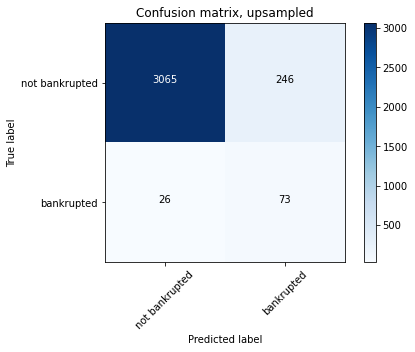

In [36]:
cnf_matrix3 = confusion_matrix(testy, y_pred4)

np.set_printoptions(precision=2)
class_names = ['not bankrupted','bankrupted',]
# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix3, classes=class_names,
                      title='Confusion matrix, upsampled')

In [37]:
print(classification_report(testy, y_pred4 ))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3311
           1       0.23      0.74      0.35        99

    accuracy                           0.92      3410
   macro avg       0.61      0.83      0.65      3410
weighted avg       0.97      0.92      0.94      3410



# 8. Error analysis and possible improvements and conclusion:
due to the our low data on bankrupted companies compared to not bankrupted companies it was hard to make the model predict if a company will be bankrupted (the model always favor not bankrupted because there is more chance it is right) even though with downsampling and upsampling we could not eliminate this issue because about 150 samples about bankrupted company with almost 100 features so it is not enough to develop a model that can detect it with high accuracy so to improve our model we have to find a better data that give us more information about the bankrupted companies 
